In [15]:
#%
import warnings

import matplotlib.pyplot as plt

warnings.filterwarnings('ignore', category=DeprecationWarning)
import os
os.environ['MKL_SERVICE_FORCE_INTEL'] = '1'
os.environ['MUJOCO_GL'] = 'egl'
os.environ['HYDRA_FULL_ERROR'] = '1'
from pathlib import Path
import hydra
import numpy as np
import torch
from dm_env import specs
import dmc
import utils
from logger import Logger
from replay_buffer import ReplayBufferStorage, make_replay_loader
from video import TrainVideoRecorder, VideoRecorder
import numpy as np
import pandas as pd
from rlutils.utils import gait_harmonic_sim
from rlutils.plot_utils import config_paper
import multiprocessing as mp

colors = config_paper()

In [16]:
df=pd.read_csv('mujoco_forcing_5.csv')
df=pd.read_csv('mujoco_forcing10.csv')
# df=pd.read_csv('mujoco_forcing.csv')
df['freq'].unique()
df.head()

,freq,phi,mode,rews,mean_period_rew
0,0.300000,1,sin,"[0, 0.0, -2.6374711452686066e-07, -1.512585130...",-0.000165
1,0.300000,1,square,"[0, -0.00024354984576591257, -0.00015814272658...",0.015298
2,0.300000,1,tri,"[0, -0.00024354984576591257, -0.00014530383145...",0.001113
3,0.810526,1,sin,"[0, 0.0, -1.6621826412805483e-06, -8.009688544...",0.010326
4,0.810526,1,square,"[0, -0.00024354984576591257, -0.00015814272658...",0.028361


mode
sin       AxesSubplot(0.125,0.11;0.775x0.77)
square    AxesSubplot(0.125,0.11;0.775x0.77)
tri       AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

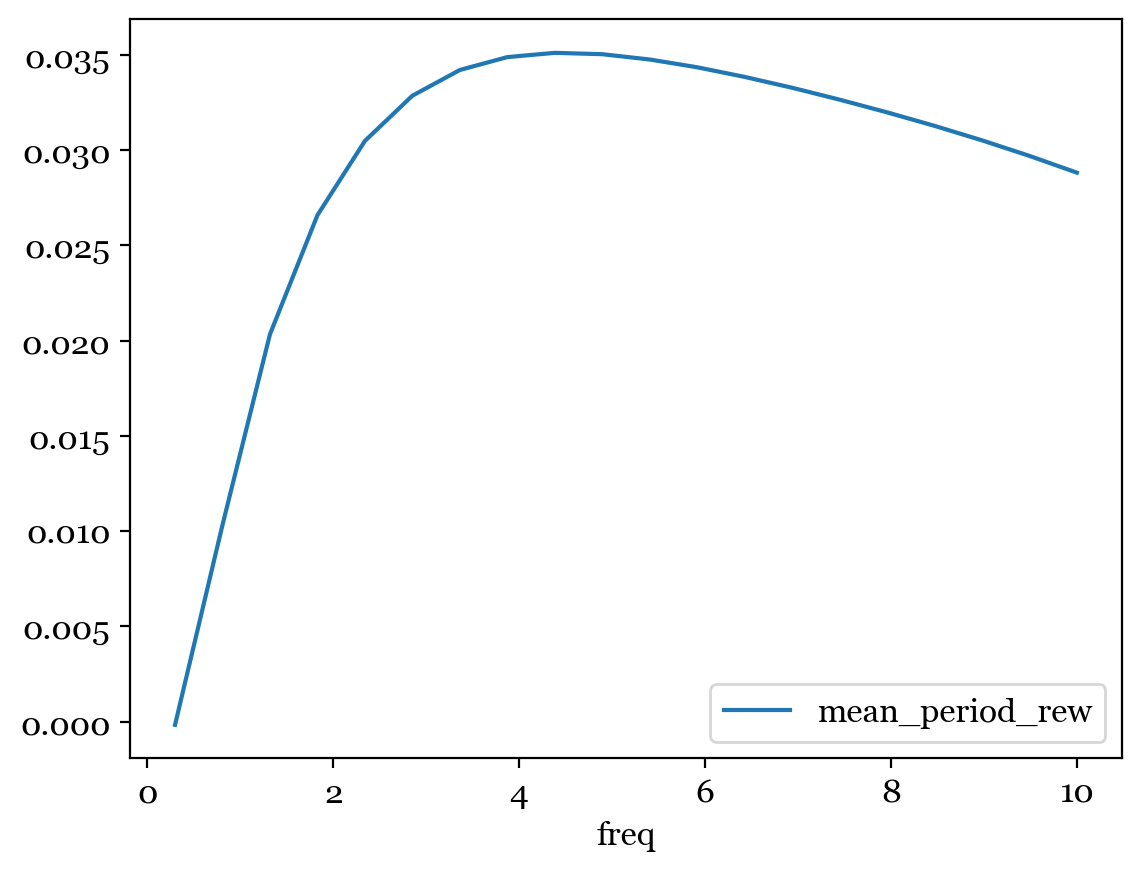

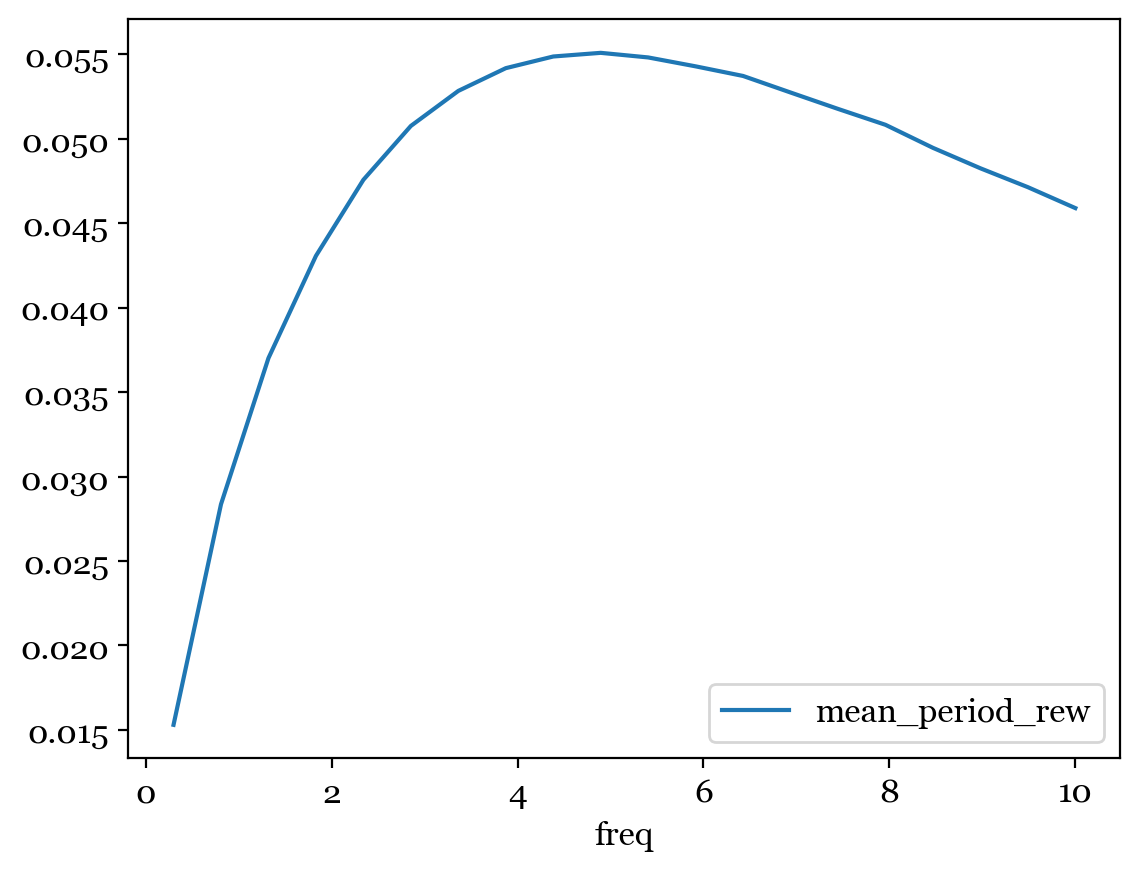

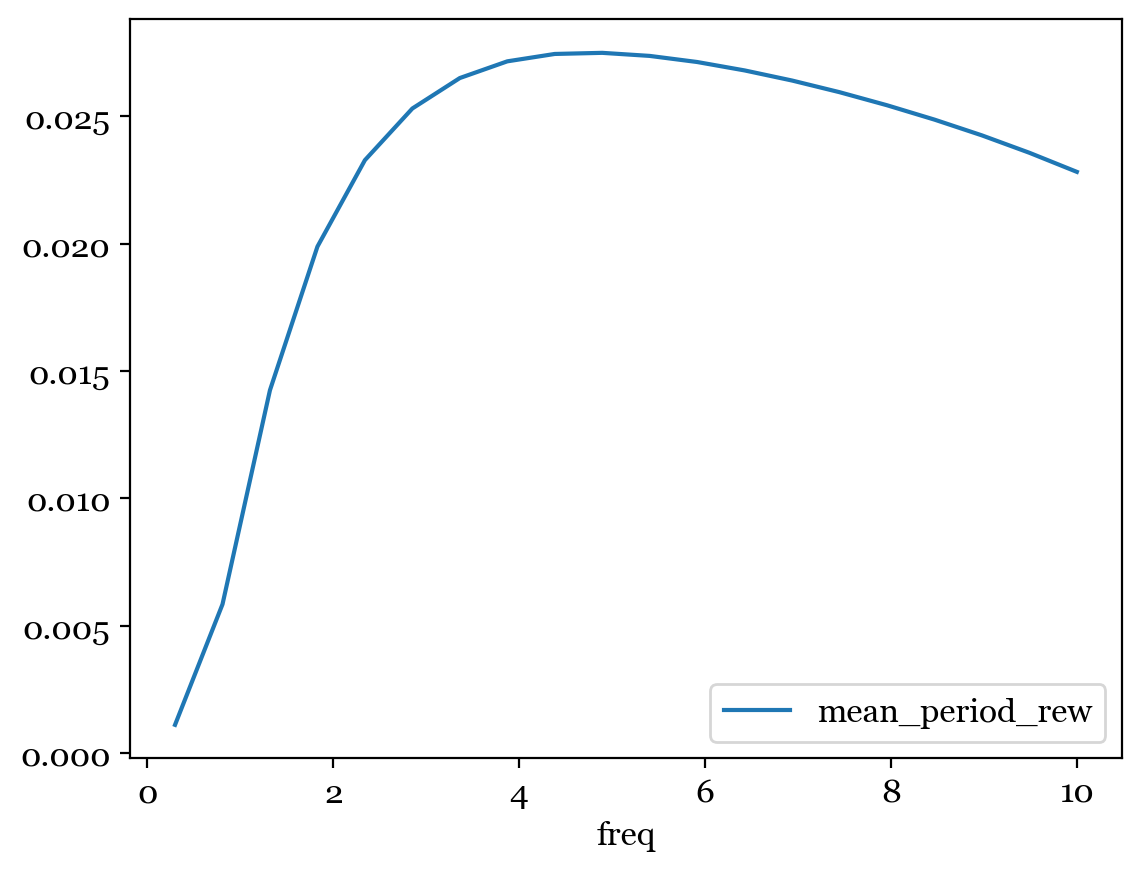

In [17]:
df.sort_values(by=['phi','freq'],inplace=True)
df.groupby('mode').plot(x='freq',y='mean_period_rew')


In [39]:
from rlutils.plot_utils import marker_gait
from matplotlib import pyplot as plt
dfp = df.pivot(index='freq', columns='mode', values='mean_period_rew')
ax=dfp.plot(color=colors,marker='o')
ax.set_xlabel("frequency (Hz)")
ax.set_ylabel("speed (m/s)")
plt.plot(2.2,0.045,'o',color='k',label='RL images')
plt.legend()
plt.savefig('mujoco_forcing10.pdf',bbox_inches='tight')
plt.show()

In [25]:
df[abs(df['mean_period_rew']-0.45)<0.34]['freq']

Series([], Name: freq, dtype: float64)

In [26]:
dfp.head()

mode,sin,square,tri
freq,,,
0.300000,-0.000165,0.015298,0.001113
0.810526,0.010326,0.028361,0.005845
1.321053,0.020328,0.037015,0.014248
1.831579,0.026577,0.043067,0.019883
2.342105,0.030474,0.047573,0.023276
